In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc, precision_recall_curve  
import matplotlib.pyplot as plt  

1.从数据文件diabetes.csv加载数据集

In [2]:
data=pd.read_csv("diabetes.csv")

2. 将数据集分隔为样本X和标记y

In [3]:
X=data.iloc[: , 0:-1]
y=data.iloc[:,-1:]
# print(X)
print(y['Outcome'])

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


3. 将数据集分隔为训练集和测试集（采用分层采样法）

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 
# print(y_train.dtype)

4. 训练模型

In [5]:
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train['Outcome'])

LogisticRegression(solver='liblinear')

5.模型评估

使用一个已经训练好的模型（model）对测试数据集（X_test）进行预测，并返回每个样本属于正类的概率。'model.predict_proba(X_test)'是调用模型的方法来预测给定输入（X_test）的类别概率。这将返回一个二维数组，其中每行对应一个测试样本，每列对应一个类别，第一列是负类的概率，第二列是正类的概率。'[:,1]'表示取该二维数组的第二列（即正类的概率），然后赋值给变量y_score。这样，y_score就存储了测试集中每个样本属于正类的概率。

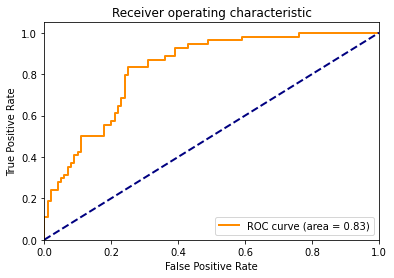

In [6]:
y_score = model.predict_proba(X_test)[:,1]  
fpr, tpr, _ = roc_curve(y_test, y_score)  
roc_auc = auc(fpr, tpr)  
  
plt.figure()  
lw = 2  
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic')  
plt.legend(loc="lower right")  
plt.show()  
  

6. 计算模型在测试集上的查准率和查全率

In [7]:
precision, recall, _ = precision_recall_curve(y_test, y_score)  
print('Precision: ', np.mean(precision))  
print('Recall: ', np.mean(recall))

Precision:  0.627284134613708
Recall:  0.6591744416171896
